# Behaviour of Symbol Error Rate with SNR in presence of AWGN 

In this notebook, we simulate the behaviour of a AWGN channel using various QAM constellations and analyze the variation of the Symbol Error Rate (SER) with SNR while keeping the energy of the constellation fixed to unity. Here we experiment with 4-QAM, 16-QAM, 64-QAM and 256-QAM. We obtain plots of the symbol error rate vs SNR both theoretically and by simulating. 

## Theory

The theoretically obtained error bound is given as 

\begin{equation}
SER = 4 \left( 1 - \frac{1}{\sqrt{M}} \right) Q \left( \frac{d}{2 \sigma} \right) - 4\left( 1 - \frac{1}{\sqrt{M}} \right)^2 Q^2 \left( \frac{d}{2 \sigma} \right)
\end{equation}

where 

- M is the number of points in the QAM constellation
- d is the minimum distance between the points
- $\sigma$ is the power of noise signal. The noise is assumed to be AWGN with i.e the noise vector is drawn from a zero mean distribution with a covariance matrix $\frac{N_0}{2} \textbf{I}$. 
- Q is the tail probability of the gaussian distribution given as 

\begin{equation}
Q(x) = \frac{1}{\sqrt{2\pi}} \int_x^{\infty} e^{-\frac{u^2}{2}} du
\end{equation}.

For such constellations, the average number of nearsest neighbors is given by 

\begin{equation}
\overline{N_e} = 4 \left( 1 - \frac{1}{\sqrt{M}} \right)
\end{equation}

The symbols (each constituted by $log_2(M)$ bits) are assumed to be equiprobable. The detector used is a ML detector which declares as the output that symbol closest to the received vector. The curves obtained are the waterfall curves.

For these simulations, the energy of the constellation is kept fixed. The average energy is given by 

\begin{equation}
\bar{\mathcal{E}_x} = \frac{1}{6} d^2 (M - 1)
\end{equation}

Setting energy to unity implies 

\begin{equation}
d = \sqrt{\frac{6}{M - 1}}
\end{equation}

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
import numpy as np
import scipy 
from scipy.stats import norm
import sys

sys.path.insert(0,"../")
from tools import *

In [8]:
# defining a few basic functions

def NNUB_QAM(n, M, d):
    """Obtains the theoretical variation of Perror with noise power
    
    Basically the variation of the Q function with noise power N0
    
    Args:
        n (list/ndarray): list of values of the noise power N0
        M (int): number of constellation points in the M-QAM
        d (float): minimum distance between the M-QAM constellation
            points
            
    Returns:
        perror (list/ndarray): list of theoretical perror values 
    """
    
    perror = 4*(1 - 1/np.sqrt(M))*norm.sf(d/np.sqrt(2*n)) - 4*((1 - 1/np.sqrt(M))**2)*(norm.sf(d/np.sqrt(2*n)))**2
    
    return perror
    
def simulate_QAM_AWGN(n, M, d, numiter, mapping):
    """Function to simulate generation, transmission and receiving, AWGN channel
    
    Args:
        n (list/ndarray): list of values of the noise power N0
        M (int): number of constellation points in the M-QAM
        d (float): minimum distance between the M-QAM constellation
            points
        numiter (int): number of iterations to run per value of N0
        mapping (list): mapping of symbols to a coordinate system
            
    Returns:
        perror (list/ndarray): list of simulated perror values 
    """
    
    perror = []

    for nindex in range(len(n)):
        n0 = n[nindex]
        count_error = 0
        for _ in range(numiter):
            X_sym = generate_M_QAM_symbol(M)
            Y = AWGN_transmit(mapping[X_sym],n0)
            Xhat_sym = AWGN_ML_detector(mapping,Y)
            if Xhat_sym != X_sym:
                count_error = count_error + 1
        perror.append(count_error/ numiter)
        
    return perror

def visualise_QAM(M, mapping):
    """Function to plot the constellation
    
    Calling this function results in a plot of the desired consteallation
    
    Args:
        M (int): number of constellation points in the M-QAM
        mapping (list): mapping of symbols to a coordinate 
            system
        
    """
    
    plt.figure(figsize = (10,8))
    plt.title(str(M) + "-QAM")
    plt.xlabel("$\phi_1$")
    plt.ylabel("$\phi_2$")
    plt.grid()
    plt.scatter(mapping[:,0], mapping[:,1])
    plt.axhline(linewidth=2, color='k')
    plt.axvline(linewidth=2, color='k')
    plt.show()
    plt.close()

def plot_practical_theoretical(n, M, practical, theoretical):
    """ Function to plot theoretical and practical plots for comparison
    
    Args:
        n (list/ndarray): list of values of the noise power N0
        M (int): number of constellation points in the M-QAM
        practical (list/ndarray): simulated values of P_error
        theoretical (list/ndarray): values of P_error using NNUB
    
    Returns:    
    """
        
    plt.figure(figsize = (10,8))
    plt.title(str(M) + "-QAM SER vs SNR")
    plt.xlabel("$10log_{10} \\left( \\frac{2}{N_0} \\right)$ dB")
    plt.ylabel("SER")
    plt.grid()
    plt.semilogy(10*np.log10(2/n), practical, label = "Simulated")
    plt.semilogy(10*np.log10(2/n), theoretical, label = "NNUB on SER")
    plt.legend()
    plt.show()
    plt.close()

## Simulation method

- Firstly, each M-QAM symbol is generated by generating $log_2(M)$ bits. 
- Each of the symbols is mapped to a point on the 2D plane.
- A symbol is generated, gaussian noise is added to it and the detector that symbol as the output whose euclidean distance is least to the given symbol.
- This is repeated numiter times. The SER is calculated as the ratio of number of wrong predictions to numiter.
- This process is repeated for different values of noise power.

## Parameters of the constellation

The error that needs to be observed is 1e-5. This requires nearly $10^7$ iterations per noise power which is not feasible. Therefore, we settle for $10^6$ iterations. 

In [9]:
# the energy of the constellations is fixed at unity
E = 1

# number of transmissions
numiter = 10**6

# variation of noise power
n = np.linspace(0.01, 0.4, 50)

## SER curves for different M-QAM constellations

### 4-QAM

The behavior of SER is studied for 4-QAM. The selection of range of noise power values and the minimum distance are made suitably.

In [10]:
# selecting 4-QAM
M =4

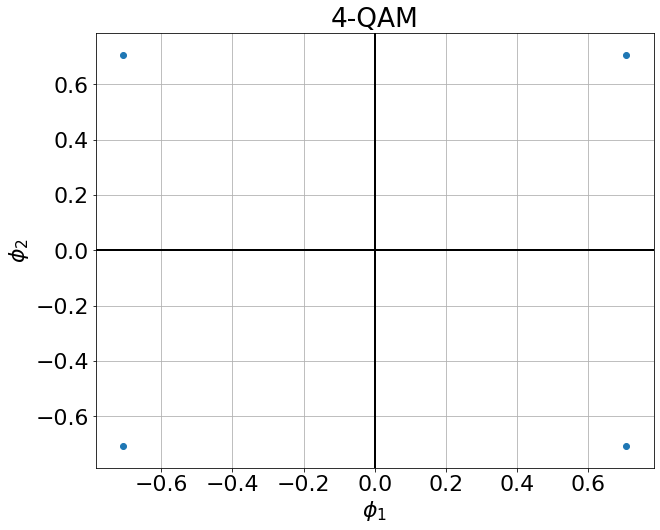

In [11]:
# generating a constellation map
d = np.sqrt(6/(M - 1))
qam4_map = generate_coordinates_M_QAM(M,d)

# visualize the constellationbB
visualise_QAM(M, qam4_map)

In [12]:
n_4qam = np.linspace(0.05, 0.4, 50)
perror_nnub_4qam = NNUB_QAM(n_4qam,M,d)
perror_sim_4qam = simulate_QAM_AWGN(n_4qam, M, d, numiter, qam4_map)

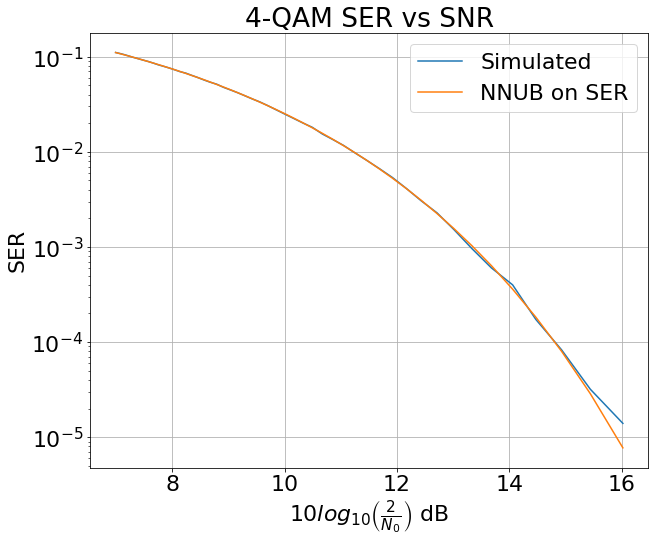

In [13]:
plot_practical_theoretical(n_4qam, M, perror_sim_4qam, perror_nnub_4qam)

### 16-QAM

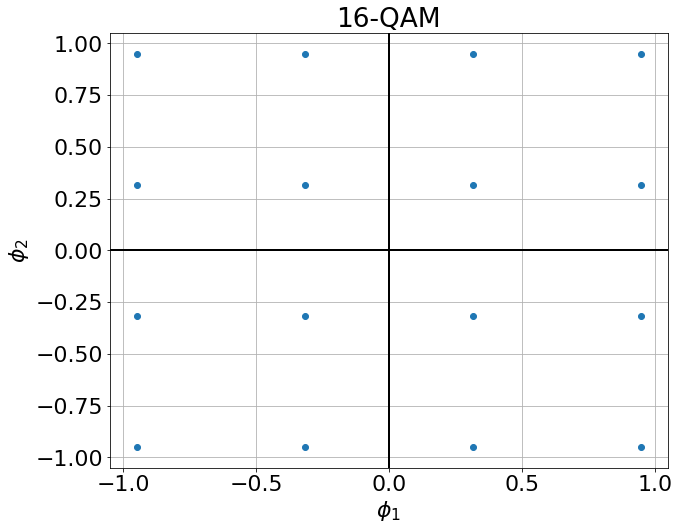

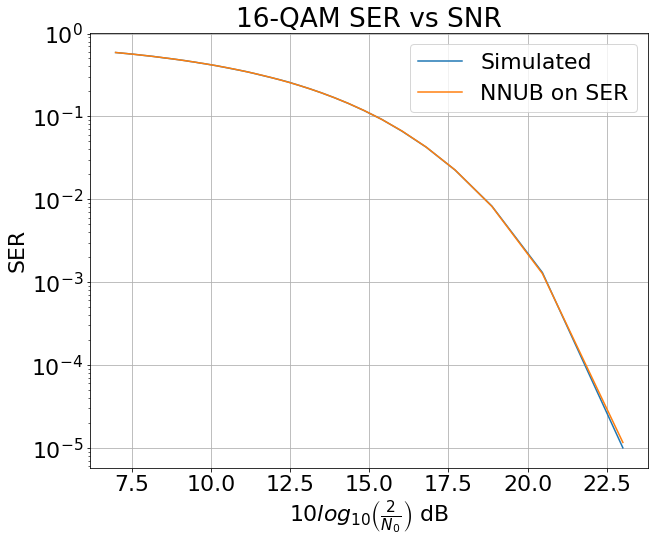

In [14]:
# selecting 16-QAM
M = 16
d = np.sqrt(6/(M - 1))
# generating a constellation map
qam16_map = generate_coordinates_M_QAM(M,d)

# visualize the constellationbB
visualise_QAM(M, qam16_map)

perror_nnub_16qam = NNUB_QAM(n,M,d)
perror_sim_16qam = simulate_QAM_AWGN(n, M, d, numiter, qam16_map)

plot_practical_theoretical(n, M, perror_sim_16qam, perror_nnub_16qam)

### 64-QAM

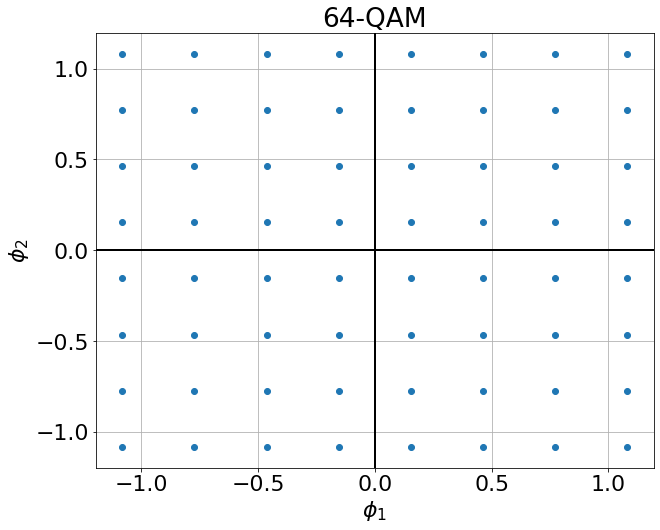

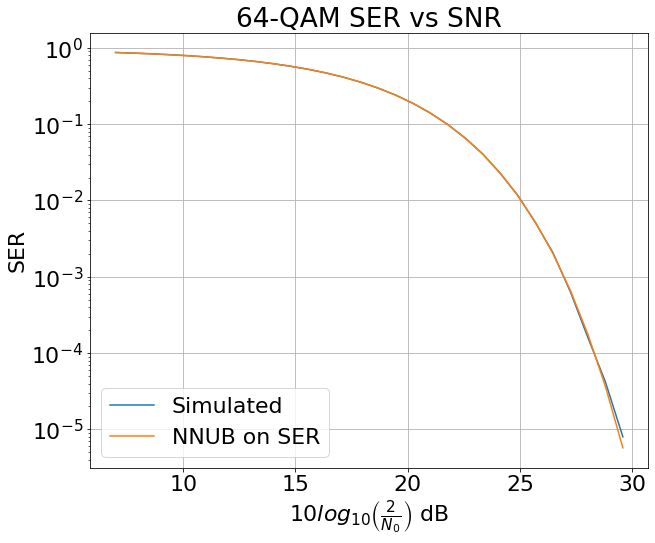

In [15]:
# selecting 64-QAM
M = 64
d = np.sqrt(6/(M - 1))
# generating a constellation map
qam64_map = generate_coordinates_M_QAM(M,d)

# visualize the constellationbB
visualise_QAM(M, qam64_map)

n_64qam = np.logspace(np.log10(0.0022), np.log10(0.4), 30)
perror_nnub_64qam = NNUB_QAM(n_64qam,M,d)
perror_sim_64qam = simulate_QAM_AWGN(n_64qam, M, d, numiter, qam64_map)

plot_practical_theoretical(n_64qam, M, perror_sim_64qam, perror_nnub_64qam)

### 256-QAM

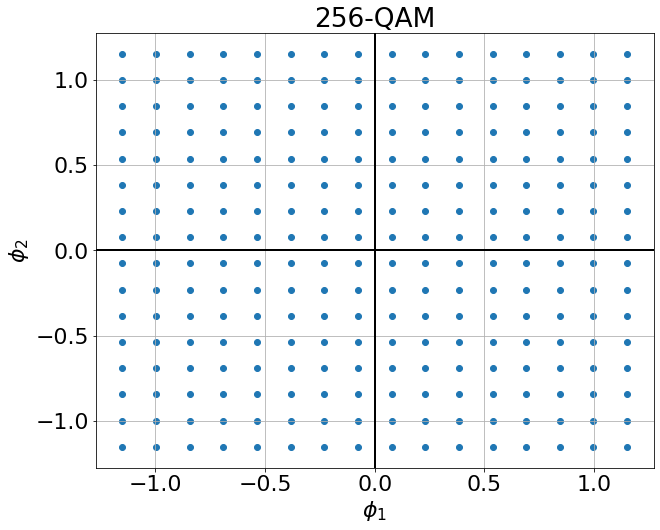

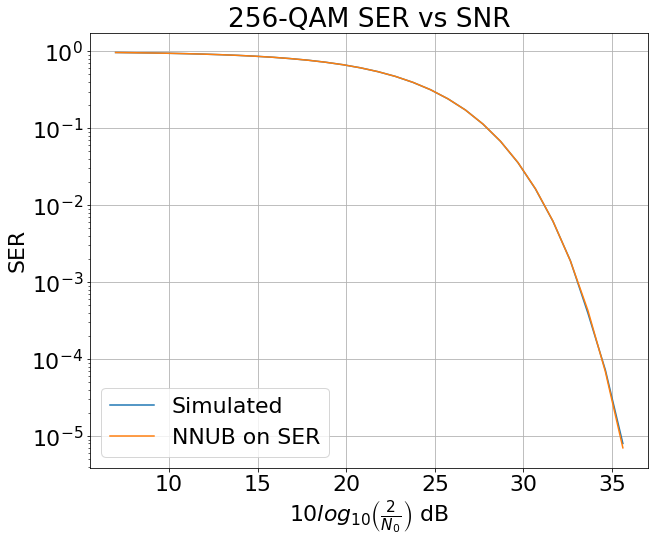

In [16]:
# selecting 256-QAM
M = 256
d = np.sqrt(6/(M - 1))
# generating a constellation map
qam256_map = generate_coordinates_M_QAM(M,d)

# visualize the constellationbB
visualise_QAM(M, qam256_map)
n_256qam = np.logspace(np.log10(0.00055), np.log10(0.4), 30)
perror_nnub_256qam = NNUB_QAM(n_256qam,M,d)
perror_sim_256qam = simulate_QAM_AWGN(n_256qam, M, d, numiter, qam256_map)

plot_practical_theoretical(n_256qam, M, perror_sim_256qam, perror_nnub_256qam)


### Variation of Perror with SNR for different constellations 

The four plots obtained from simulation and the four plots obtained using the nearest neighbor union bound approximation are presented as two separate graphs for the sake of comparison.

__Note__: The highest number of iterations used is 1e6. To obtain a error or 1e-5 at least 1e7 iterations need to be performed. This is why there are artefacts in the regions of higher SNR- lower P_error.

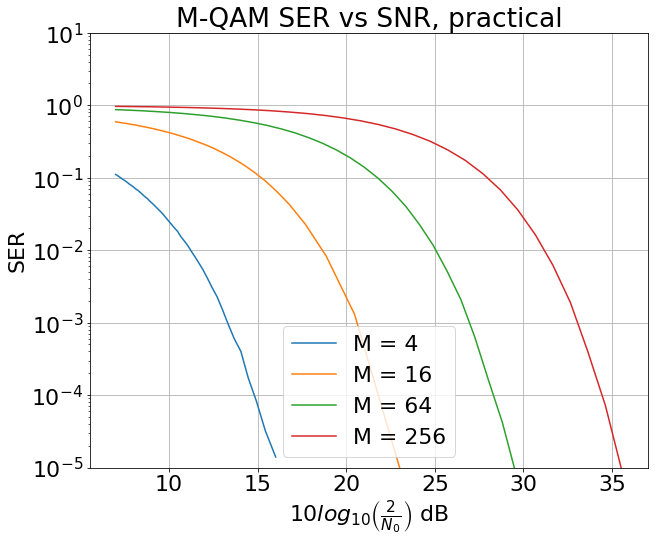

In [17]:
plt.figure(figsize = (10,8))
plt.title("M-QAM SER vs SNR, practical")
plt.xlabel("$10log_{10} \\left( \\frac{2}{N_0} \\right)$ dB")
plt.ylabel("SER")
plt.grid()
plt.semilogy(10*np.log10(2/n_4qam), perror_sim_4qam, label = "M = 4")
plt.semilogy(10*np.log10(2/n), perror_sim_16qam, label = "M = 16")
plt.semilogy(10*np.log10(2/n_64qam), perror_sim_64qam, label = "M = 64")
plt.semilogy(10*np.log10(2/n_256qam), perror_sim_256qam, label = "M = 256")
plt.ylim(1e-5,10)
plt.legend()
plt.show()
plt.close()

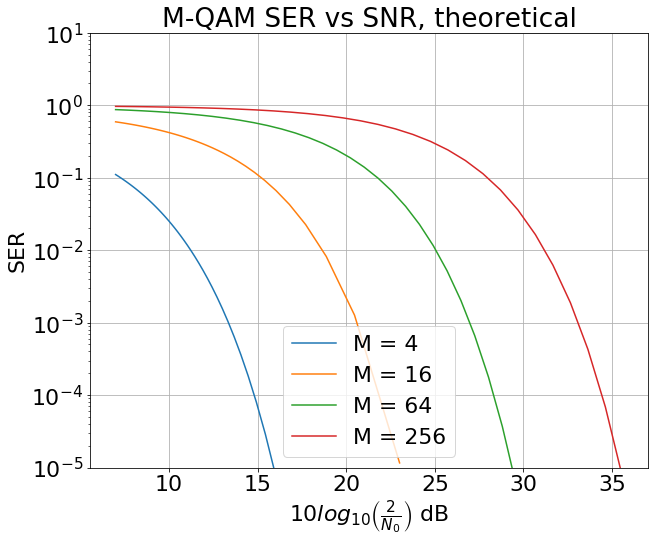

In [18]:
plt.figure(figsize = (10,8))
plt.title("M-QAM SER vs SNR, theoretical")
plt.xlabel("$10log_{10} \\left( \\frac{2}{N_0} \\right)$ dB")
plt.ylabel("SER")
plt.grid()
plt.semilogy(10*np.log10(2/n_4qam), perror_nnub_4qam, label = "M = 4")
plt.semilogy(10*np.log10(2/n), perror_nnub_16qam, label = "M = 16")
plt.semilogy(10*np.log10(2/n_64qam), perror_nnub_64qam, label = "M = 64")
plt.semilogy(10*np.log10(2/n_256qam), perror_nnub_256qam, label = "M = 256")
plt.ylim(1e-5,10)
plt.legend()
plt.show()
plt.close()

## Conclusion

It can be seen that the theoretical curves and practical curves agree closely and a higher SNR is needed to obtain the same probability of error for higher values of N. Poor results are obtained for numiter less that $10^6$.